# PCA of different Panels * Datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


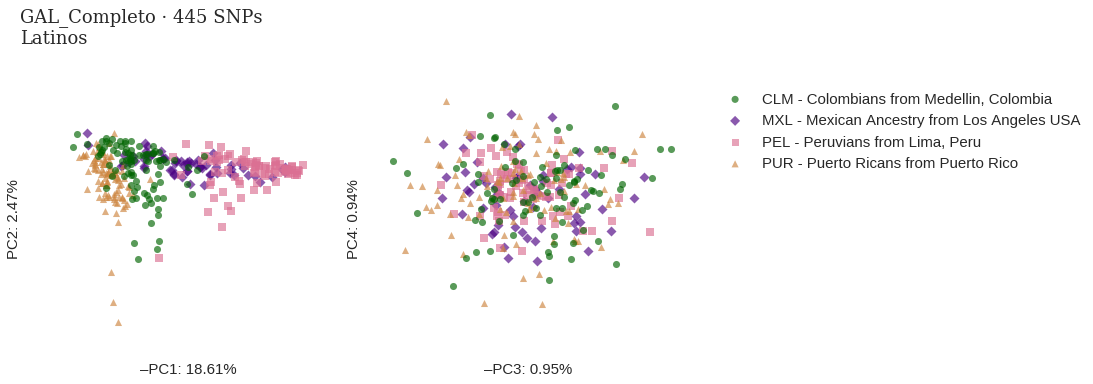

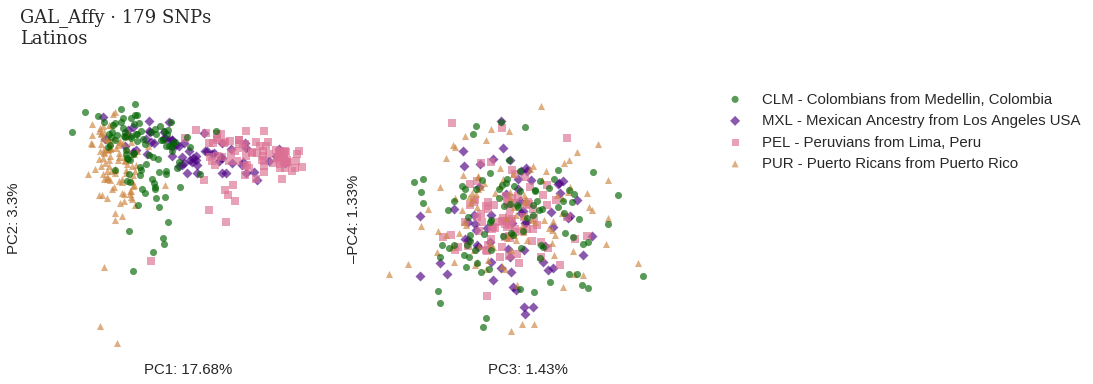

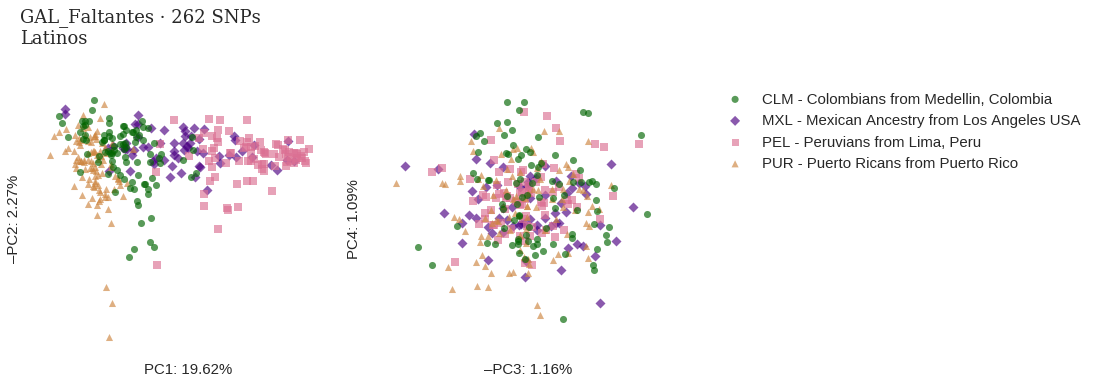

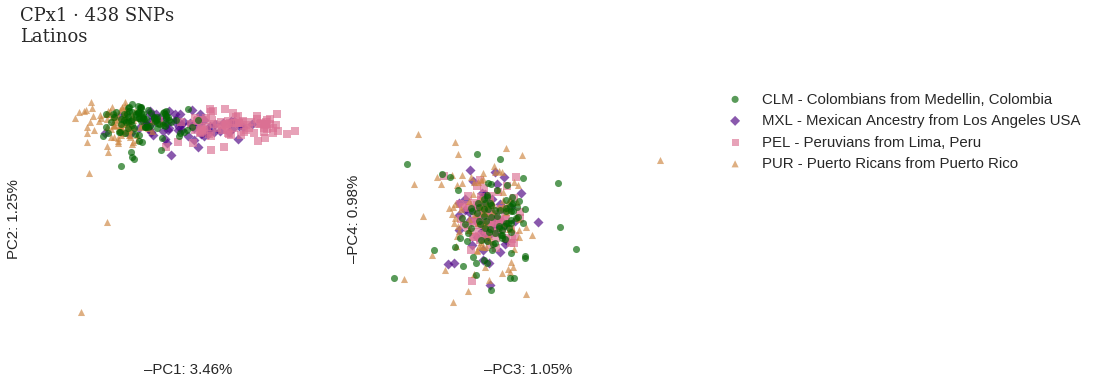

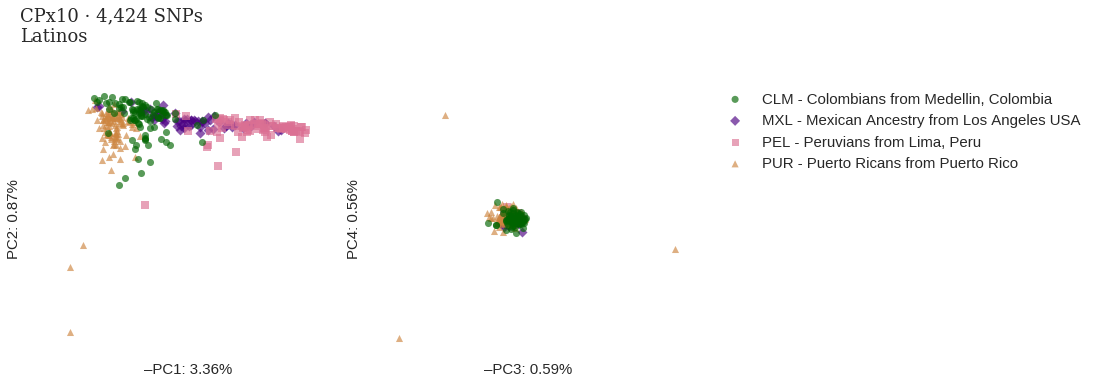

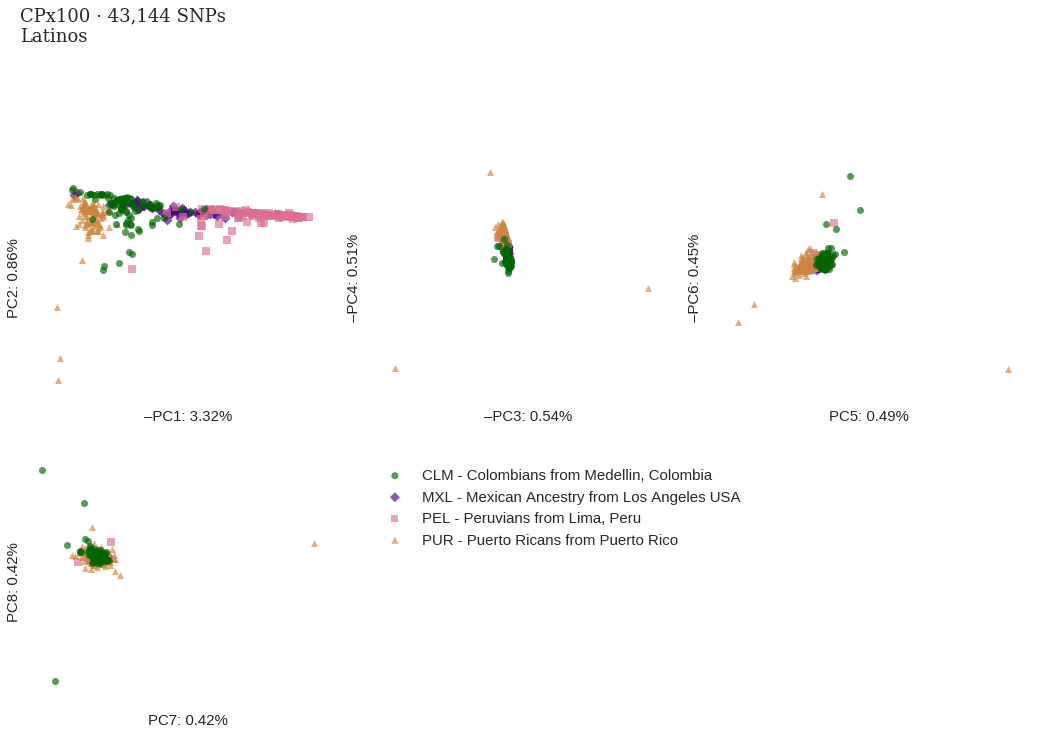

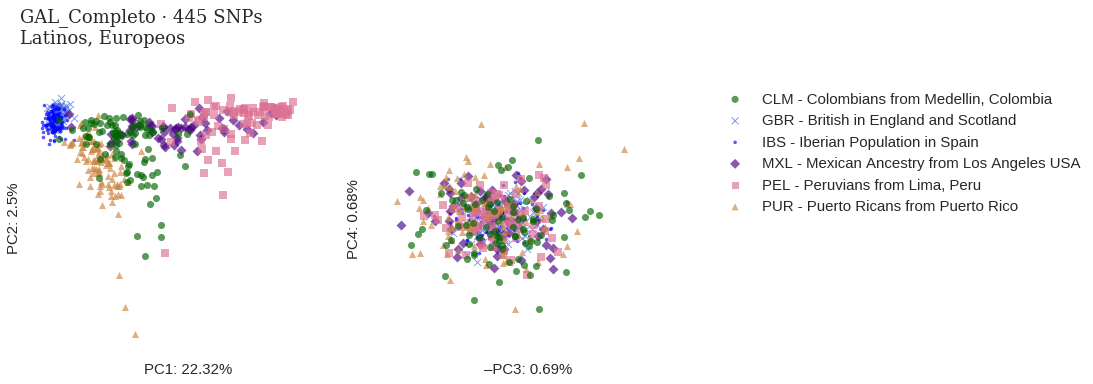

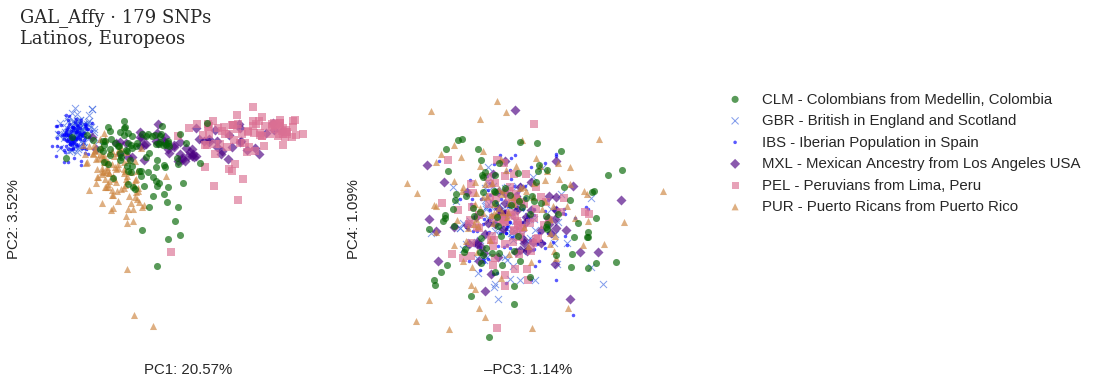

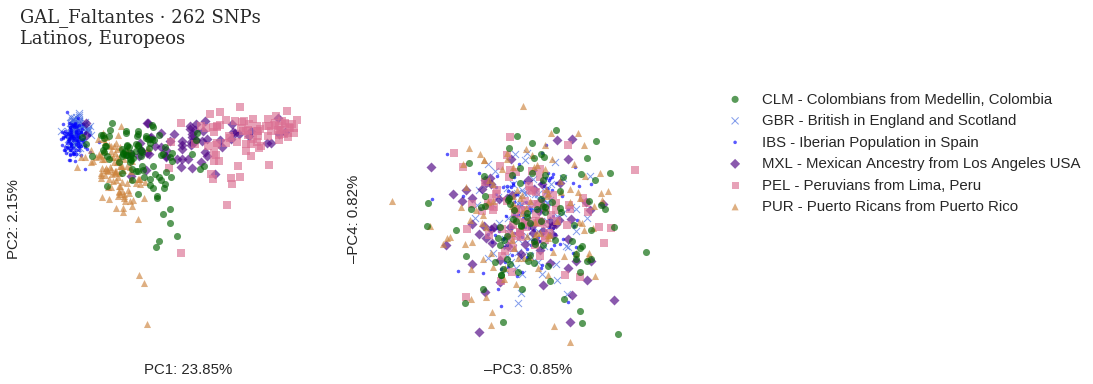

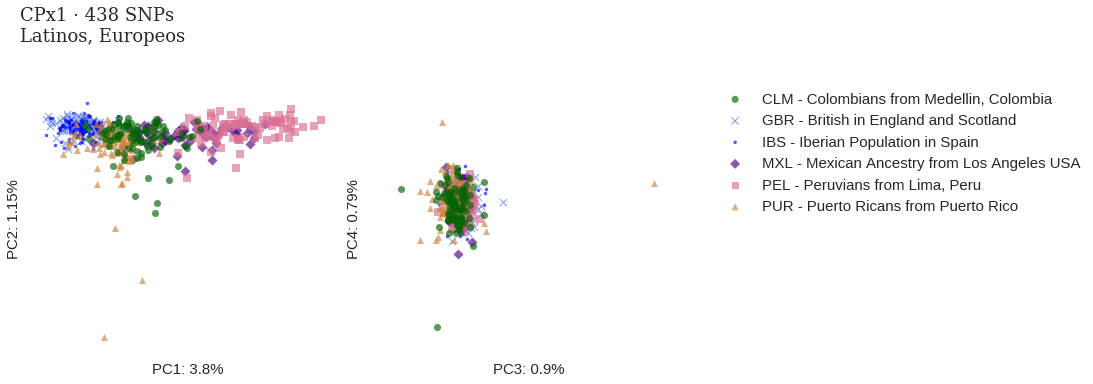

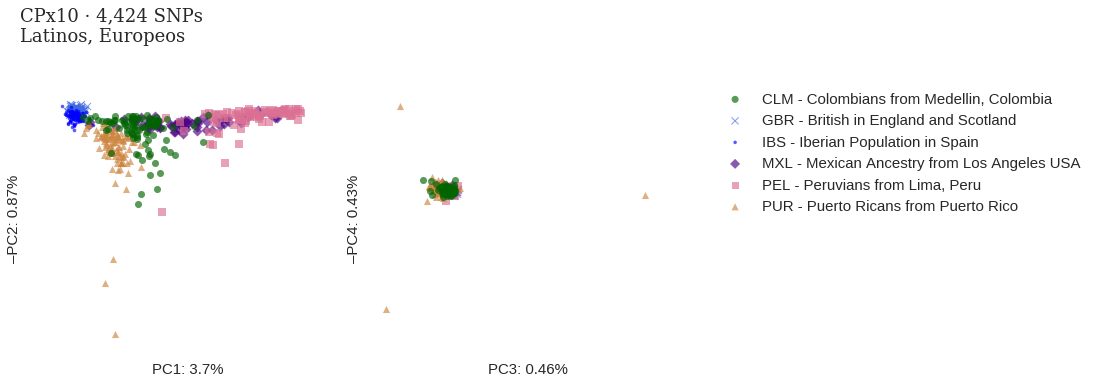

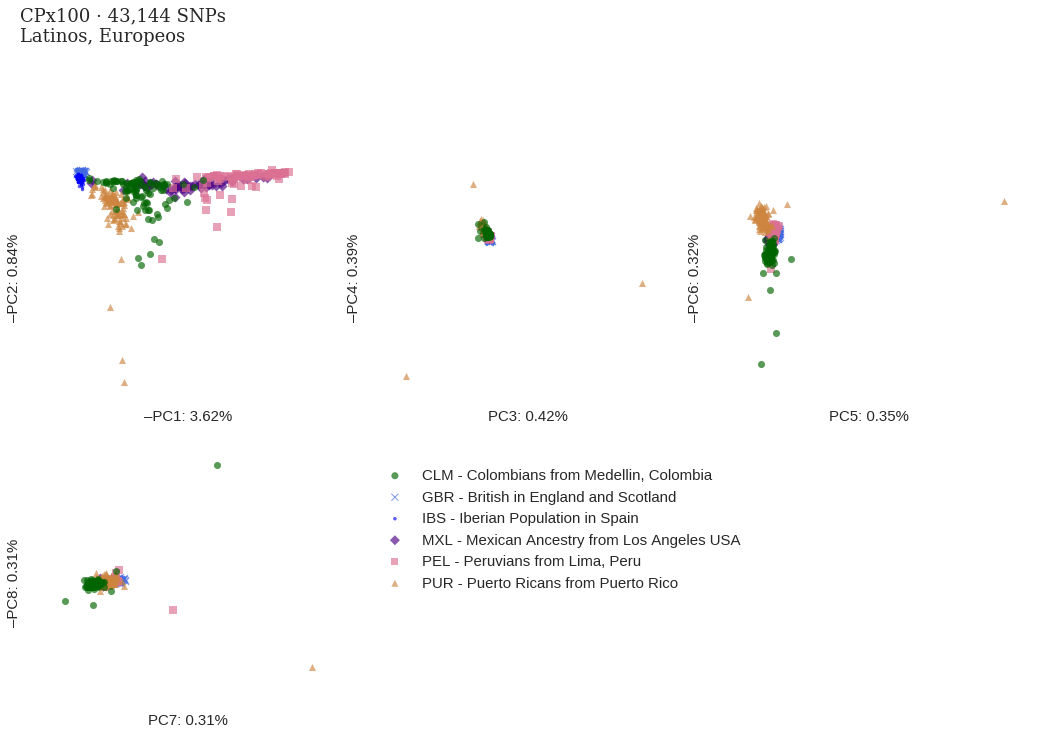

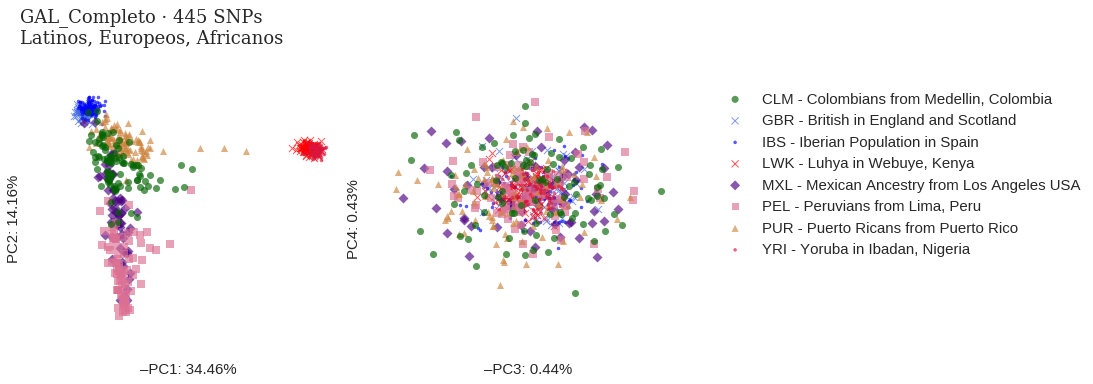

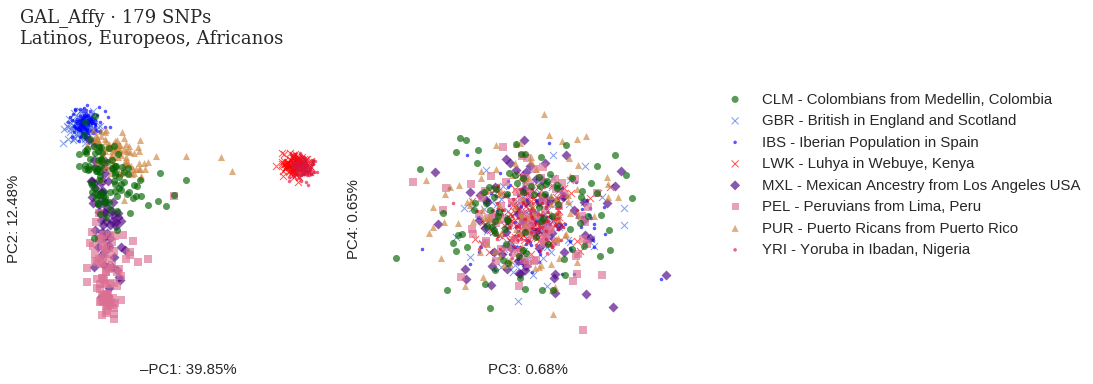

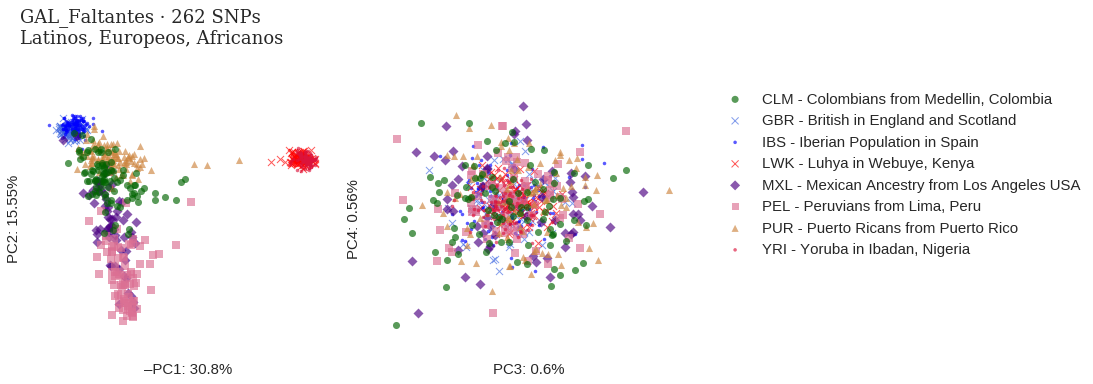

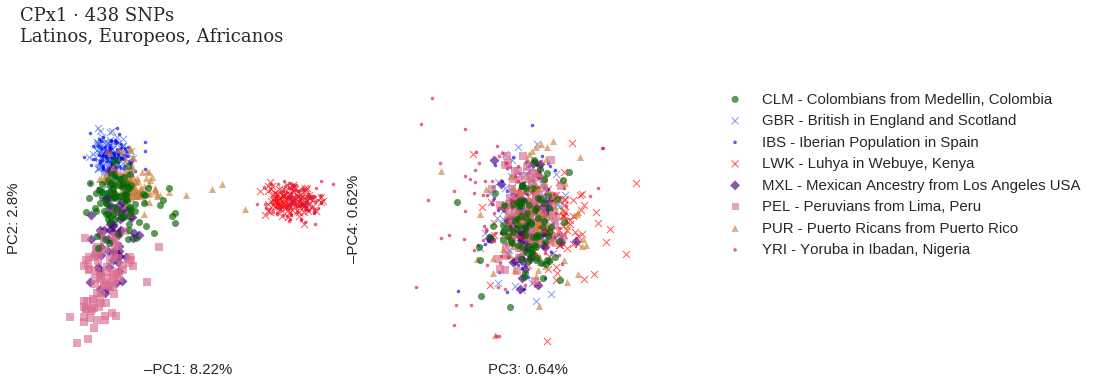

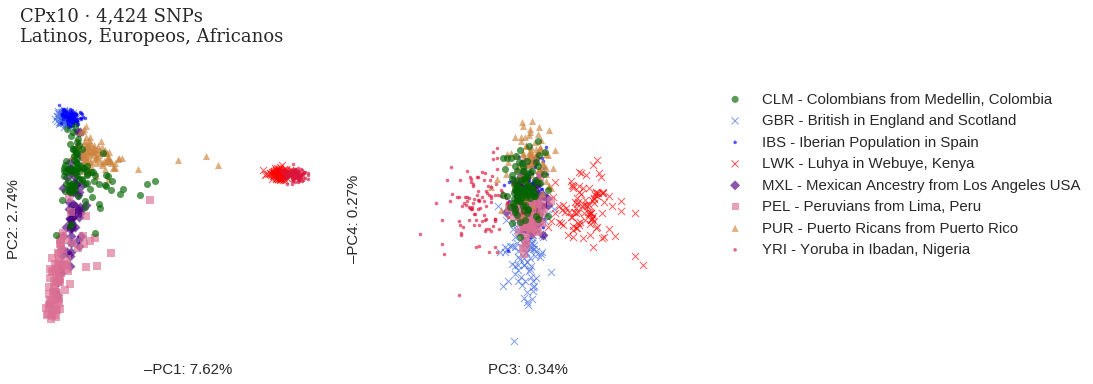

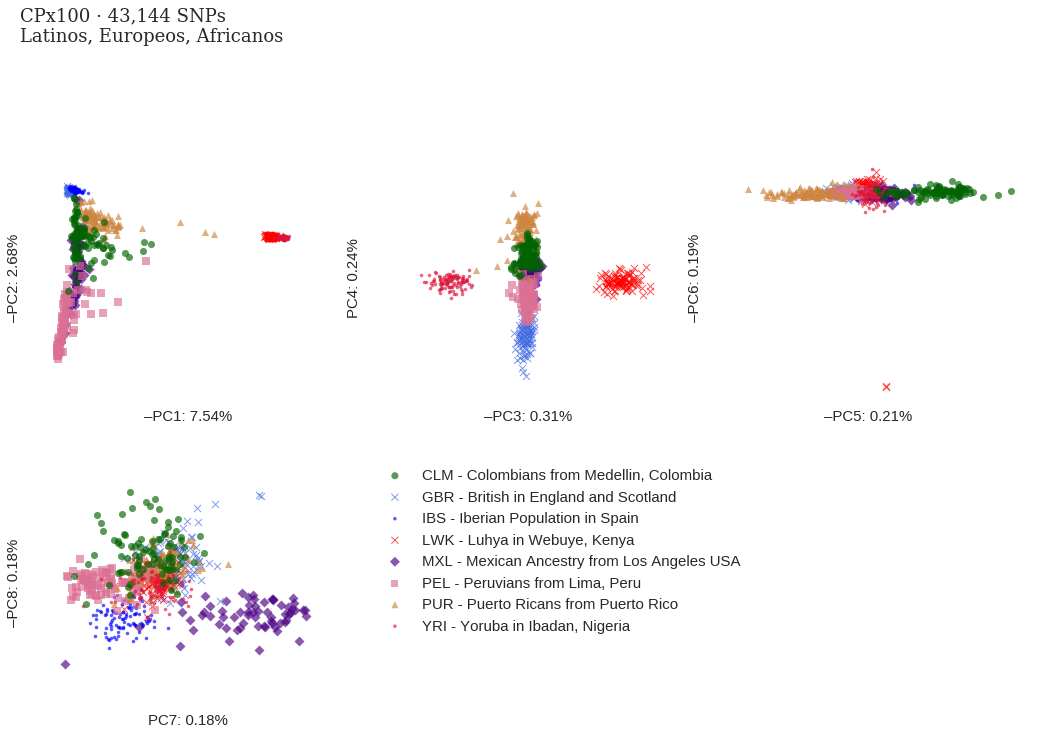

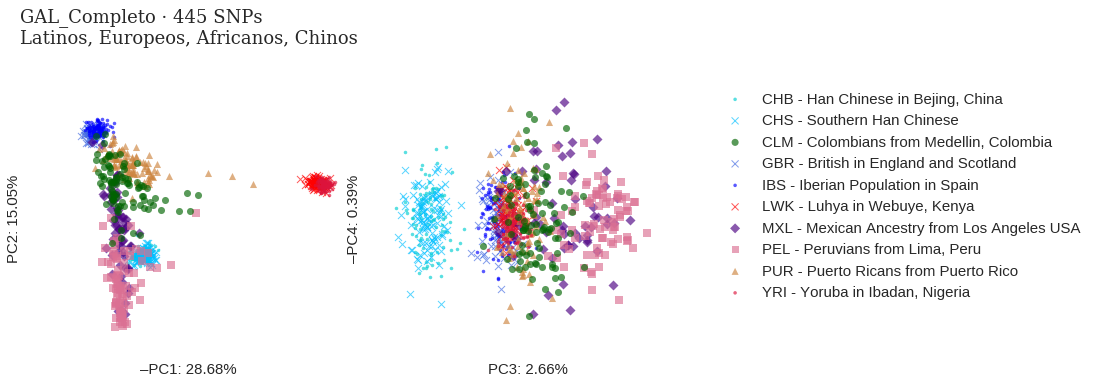

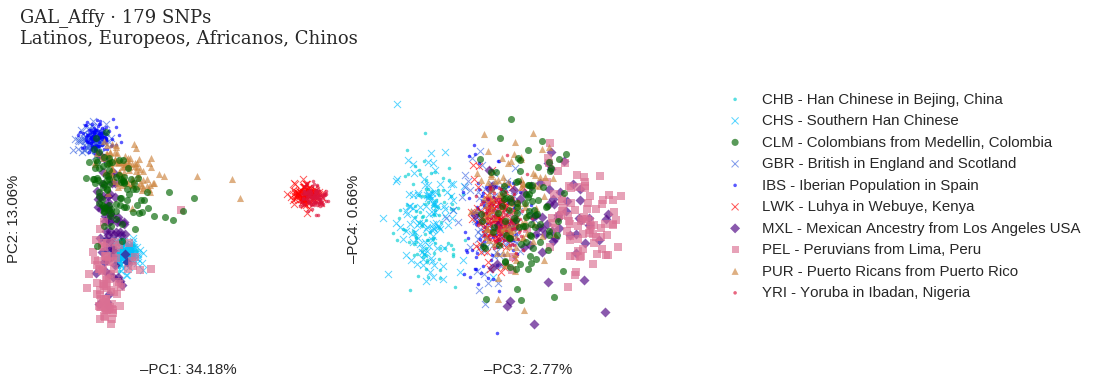

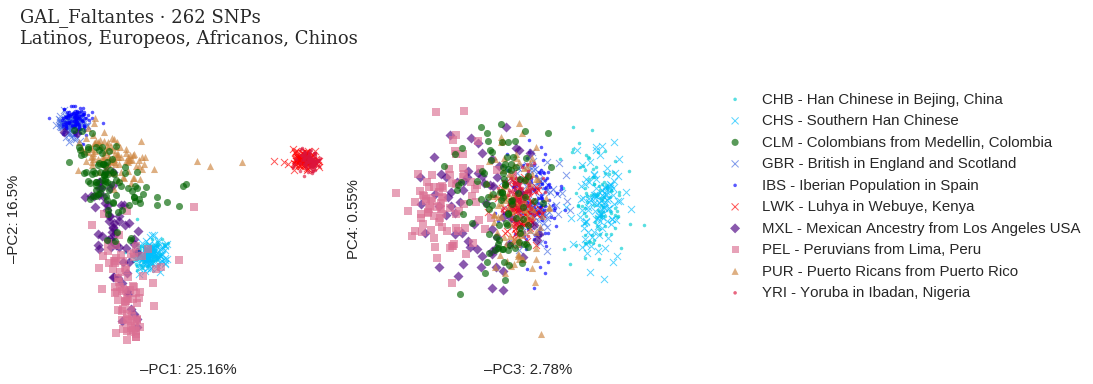

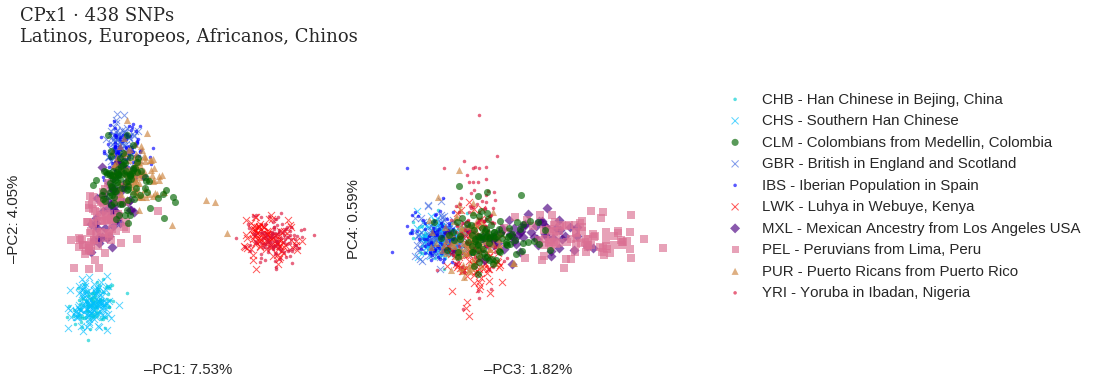

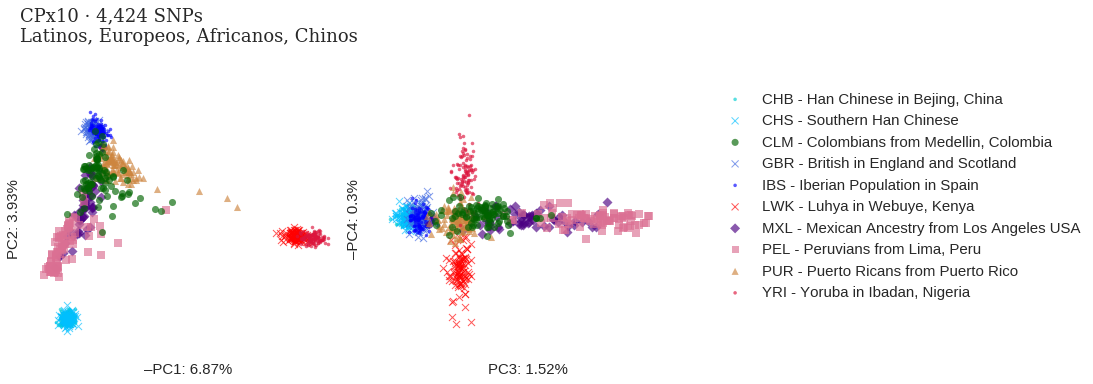

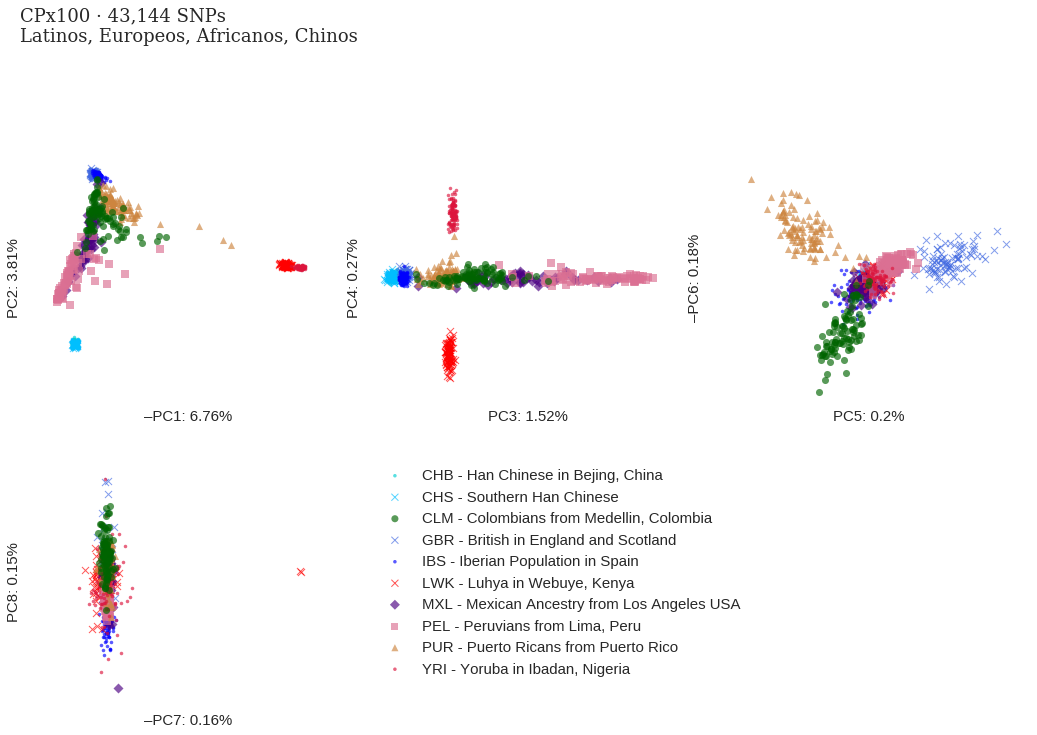

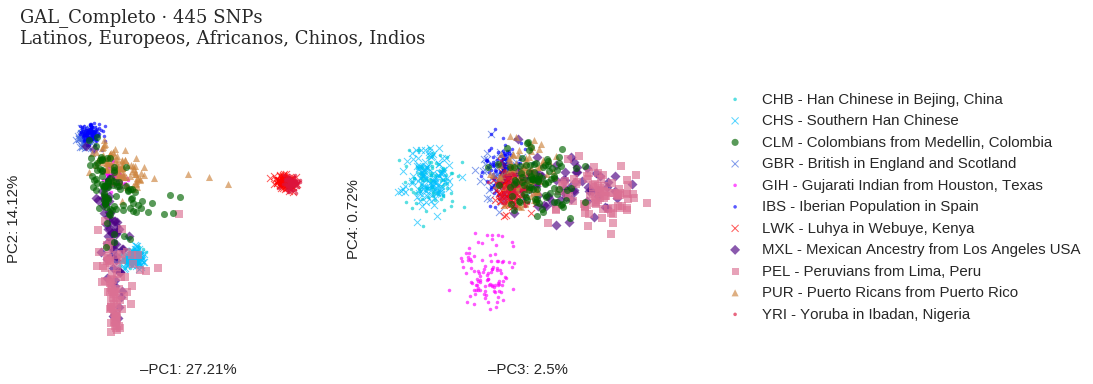

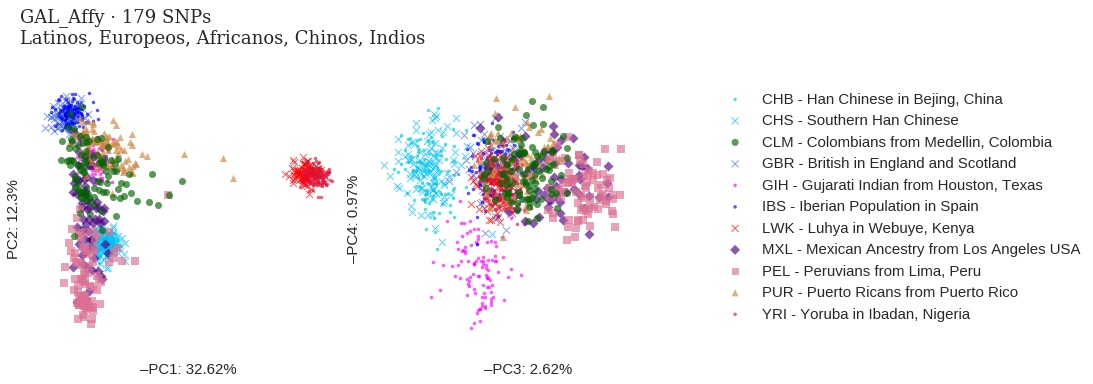

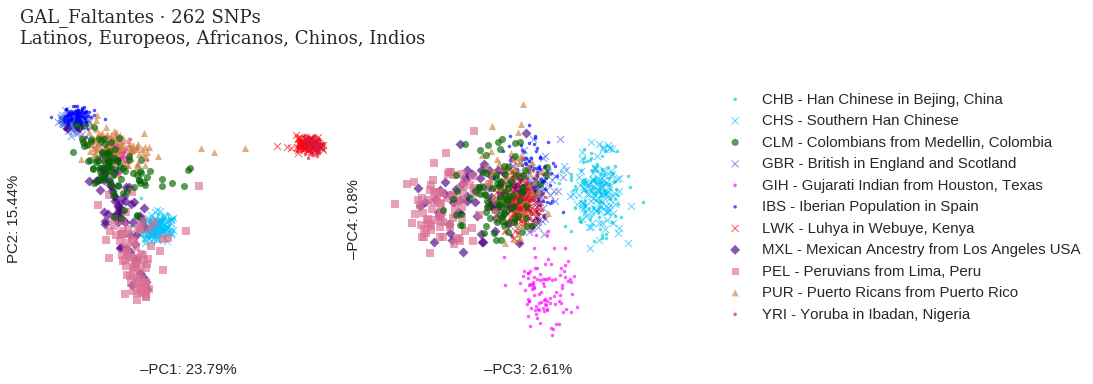

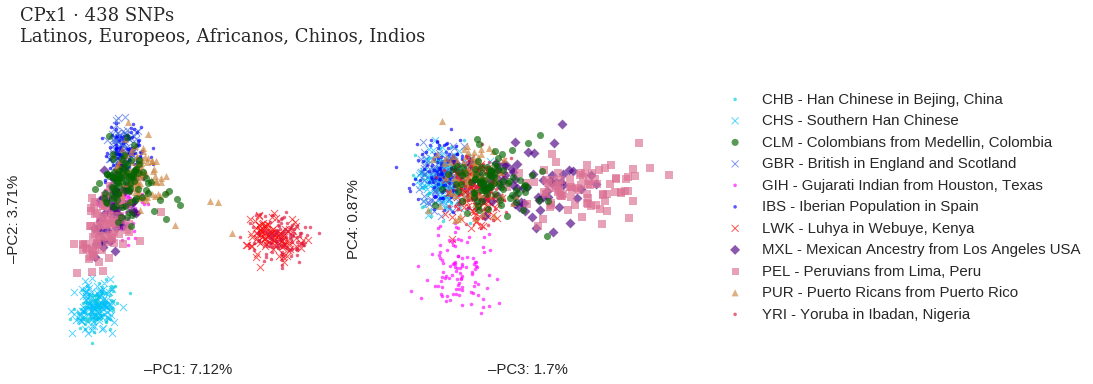

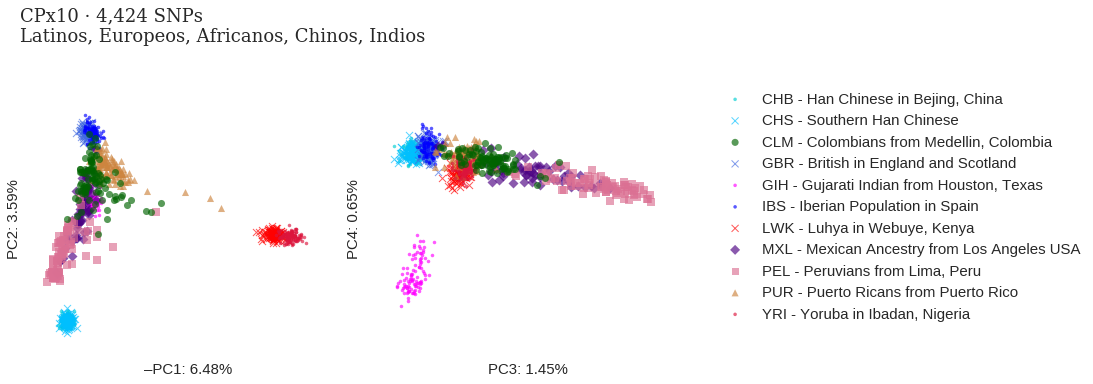

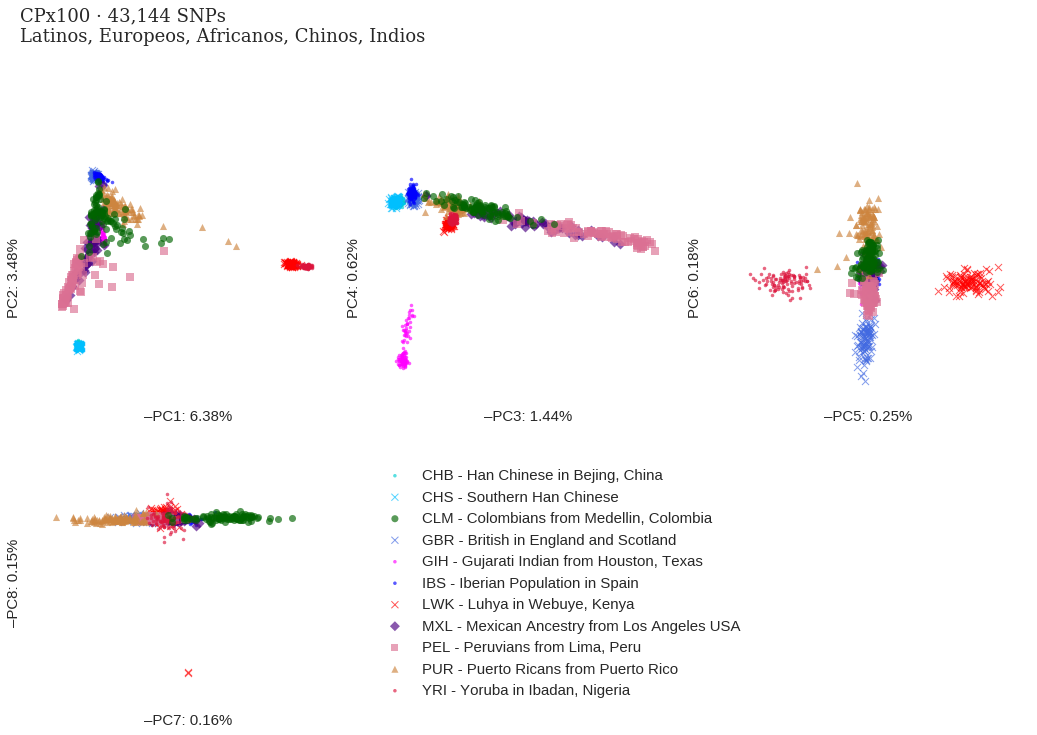

/home/juan/repos/tesina/pca/pca_generator.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  genotypes.dropna(axis=1, inplace=True)


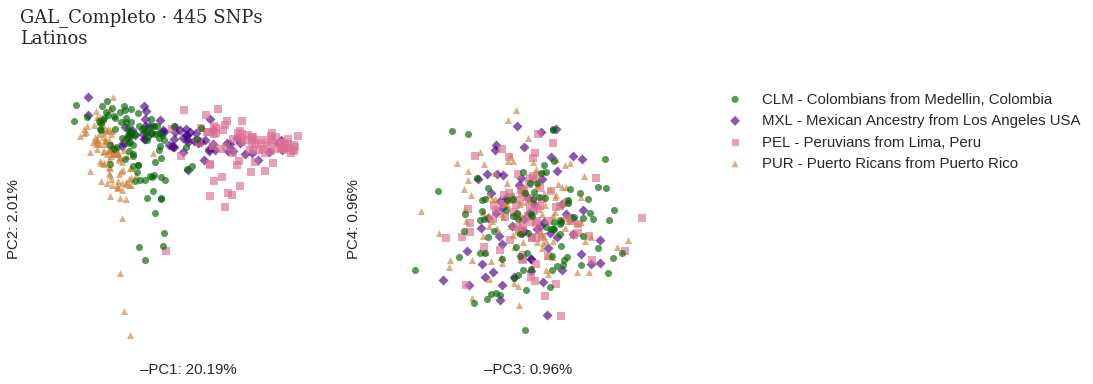

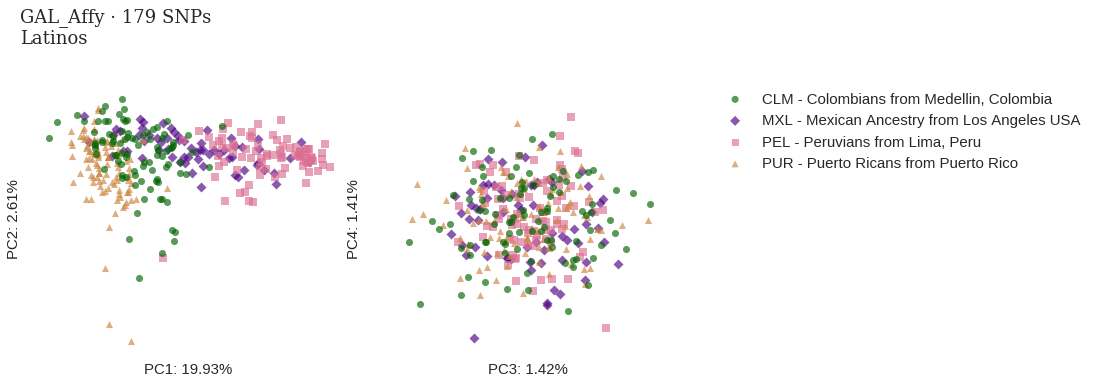

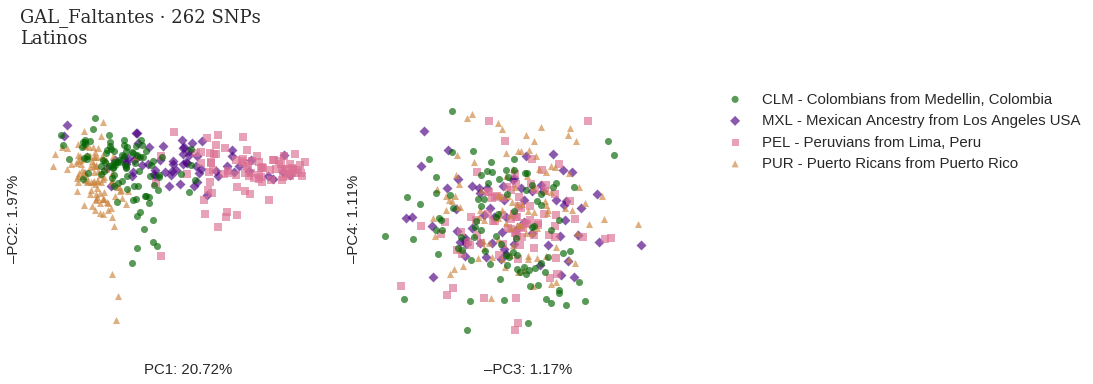

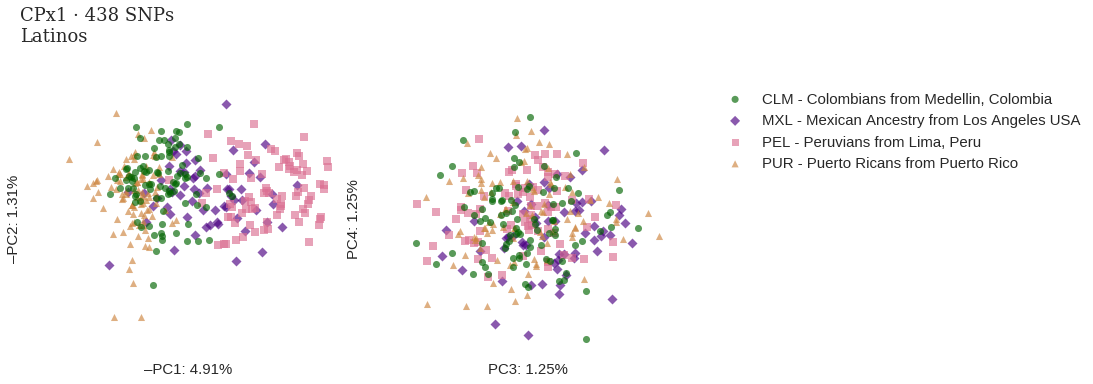

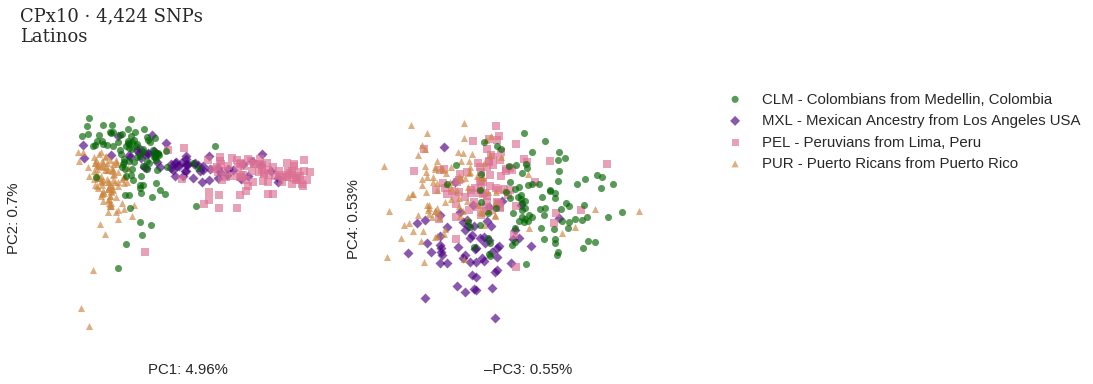

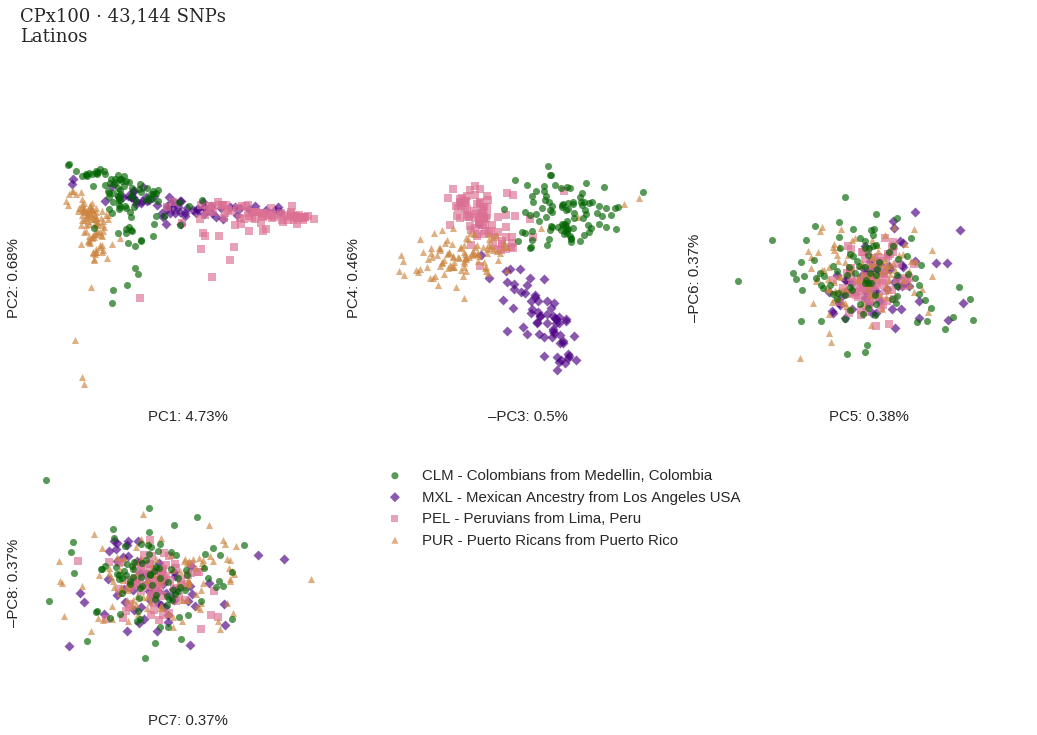

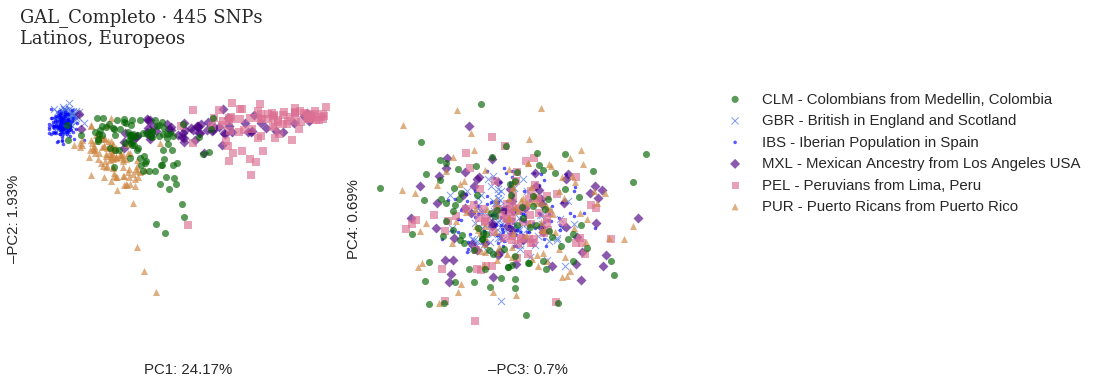

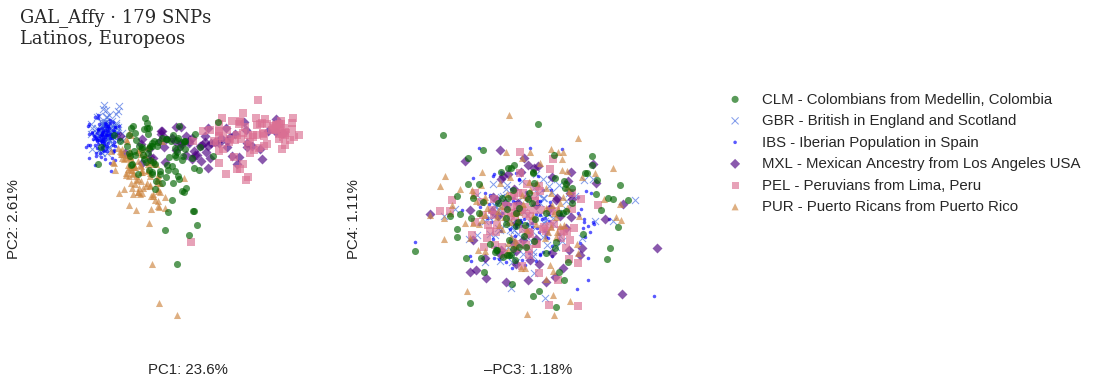

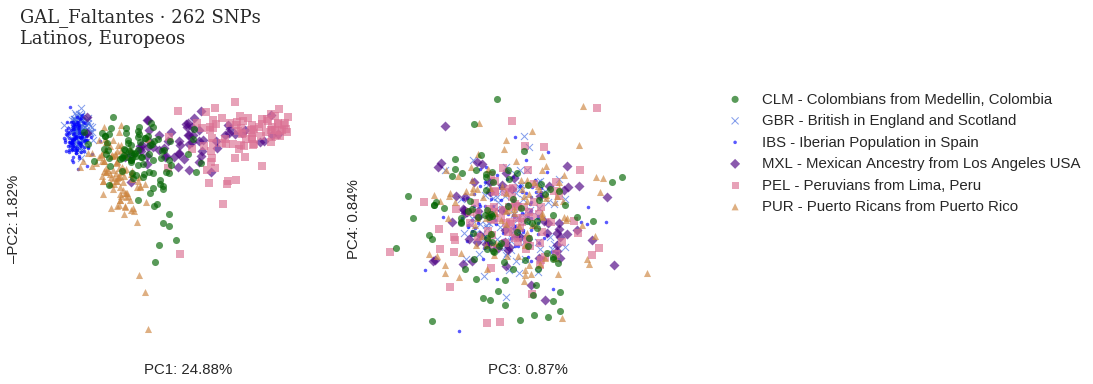

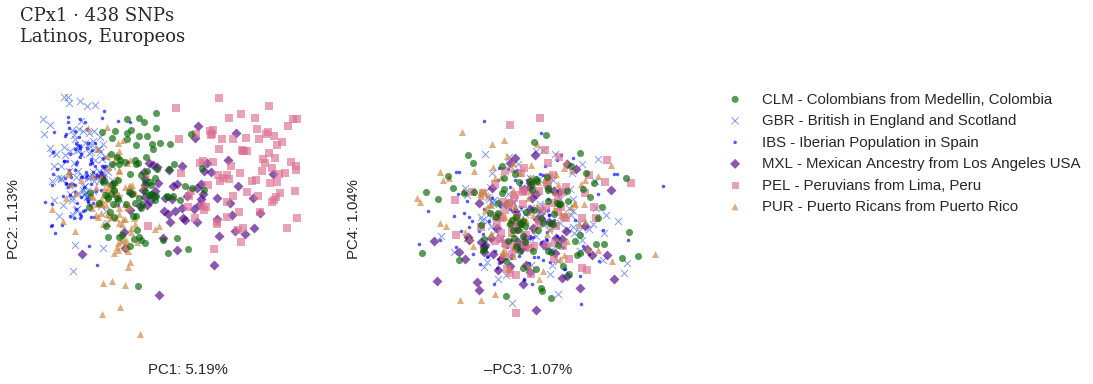

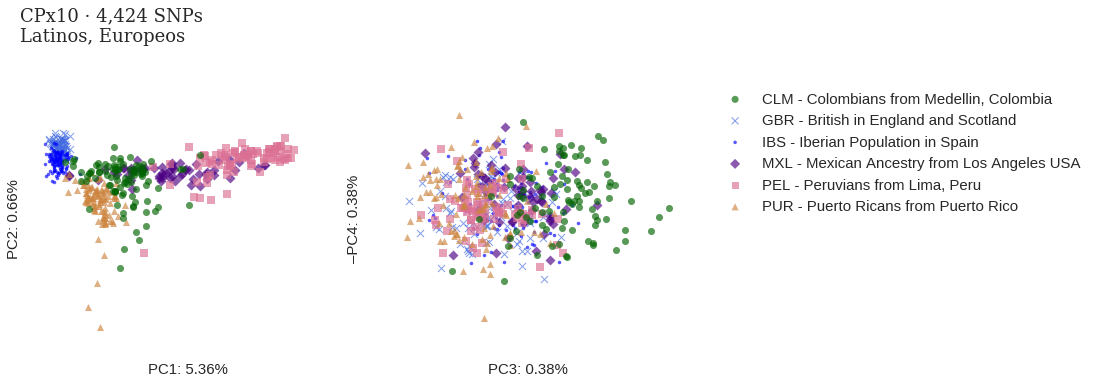

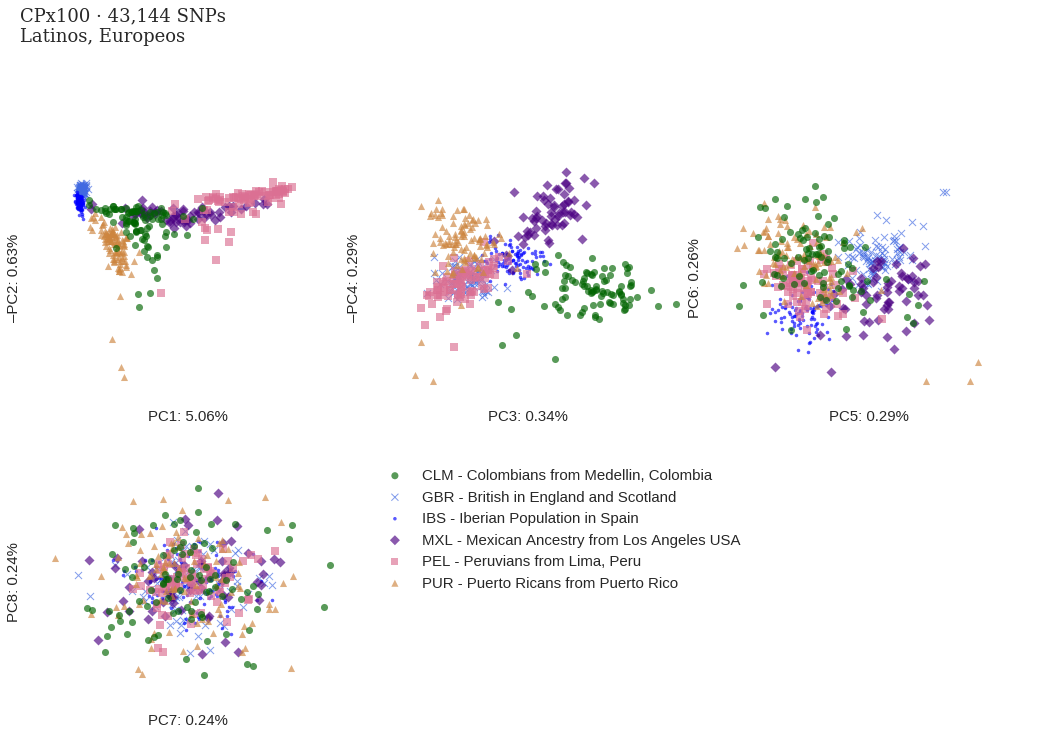

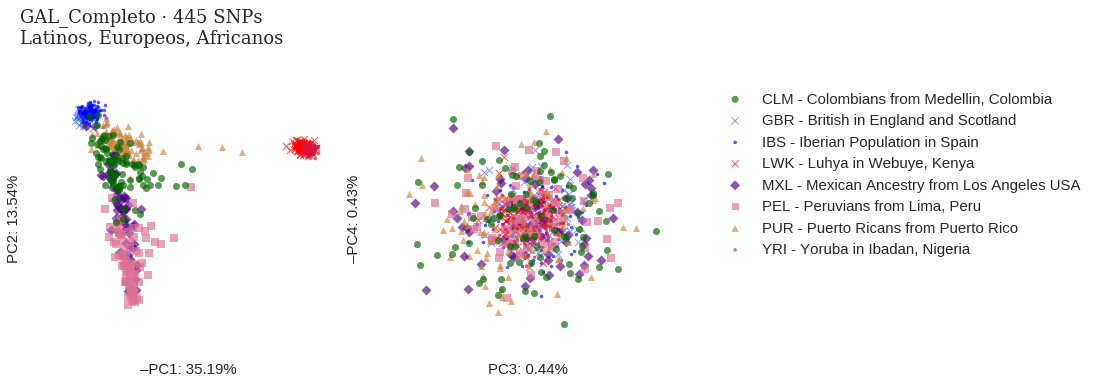

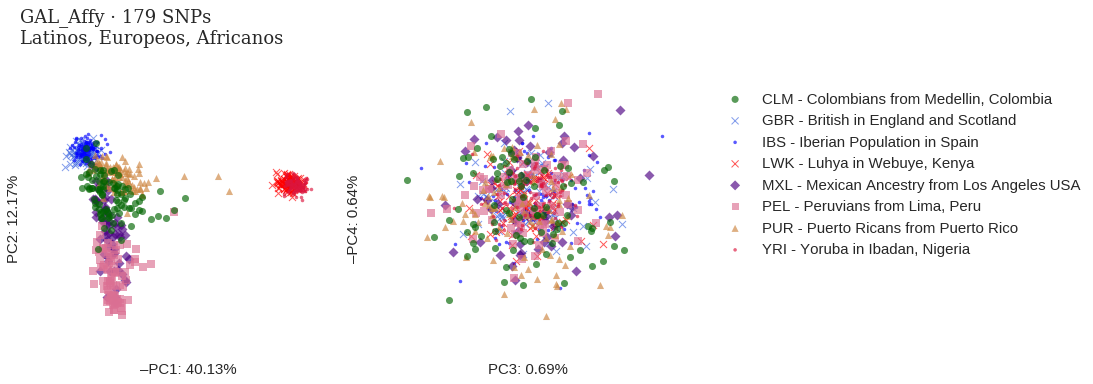

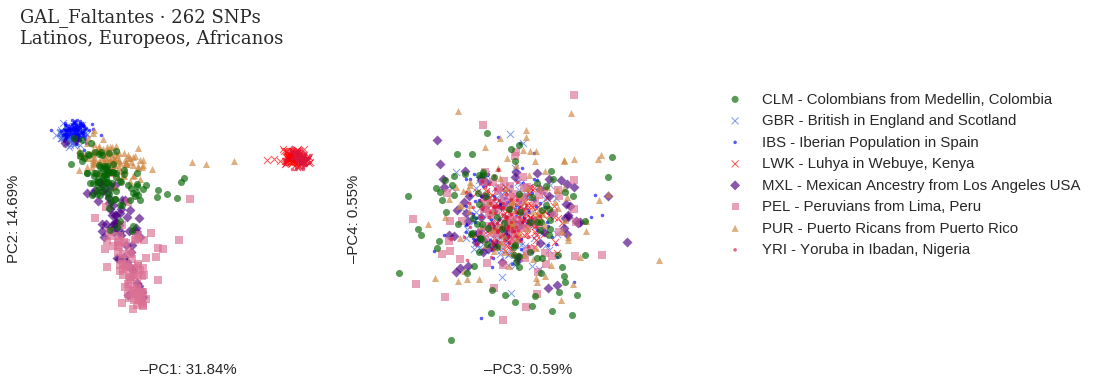

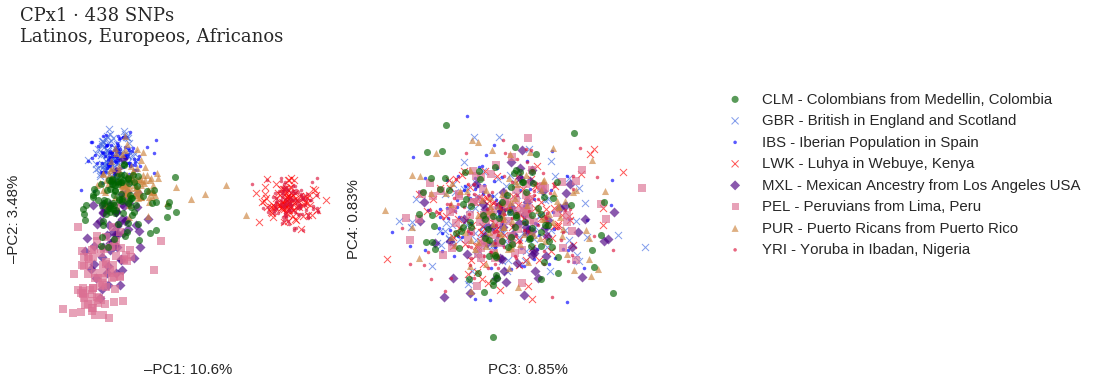

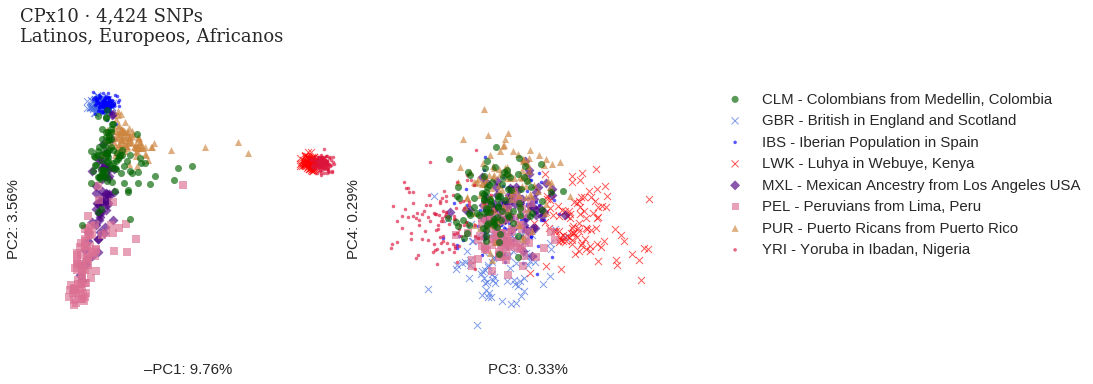

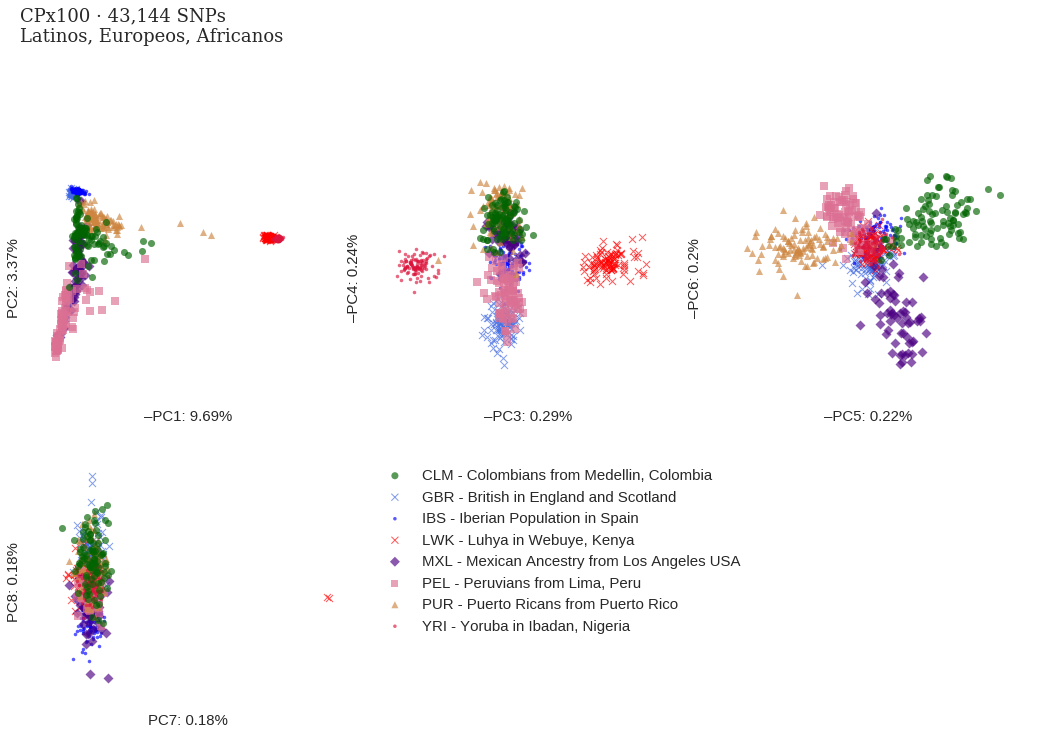

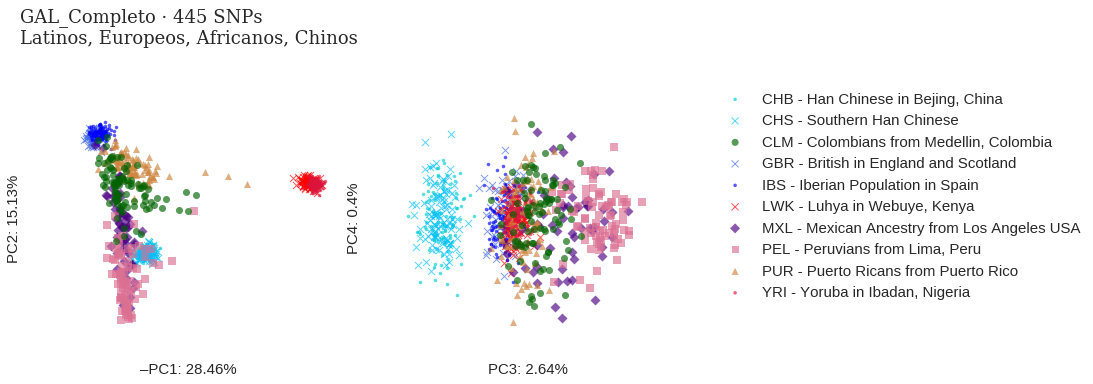

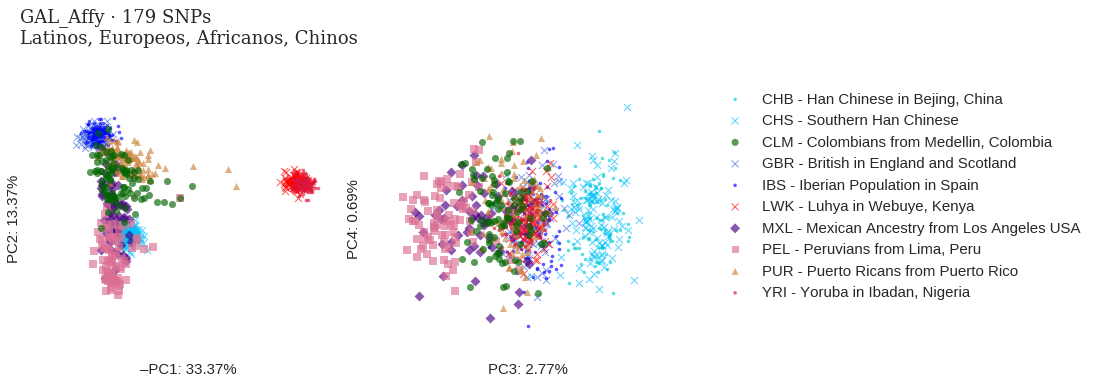

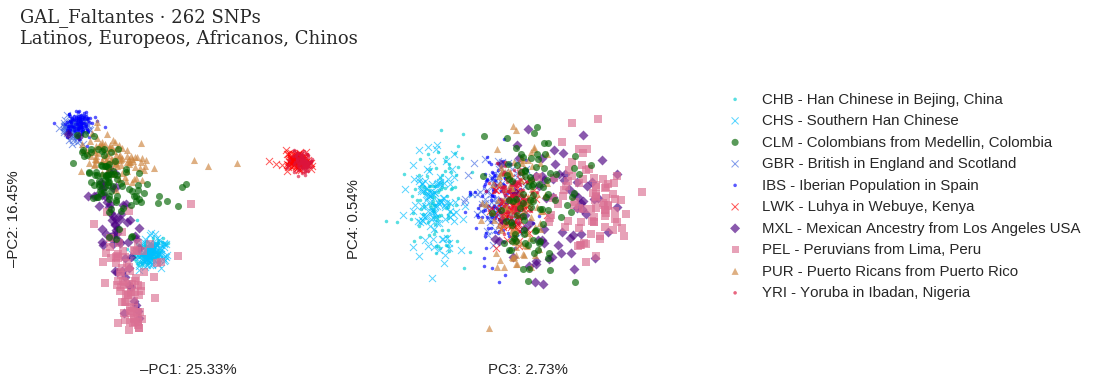

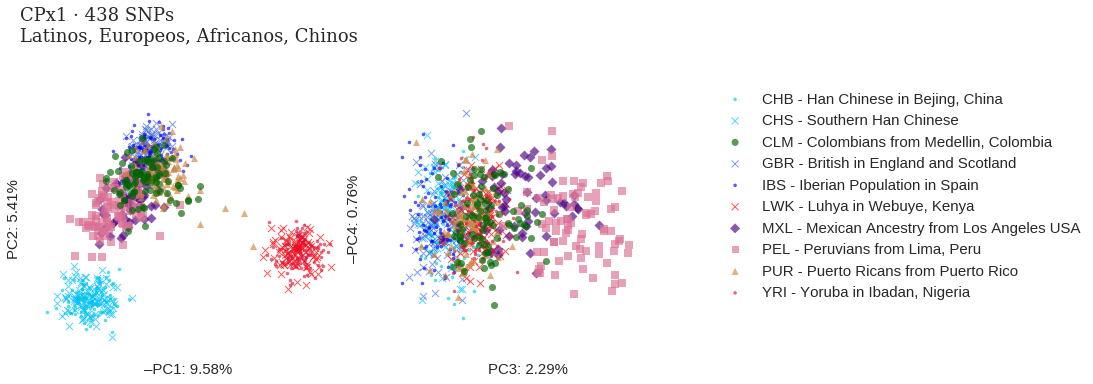

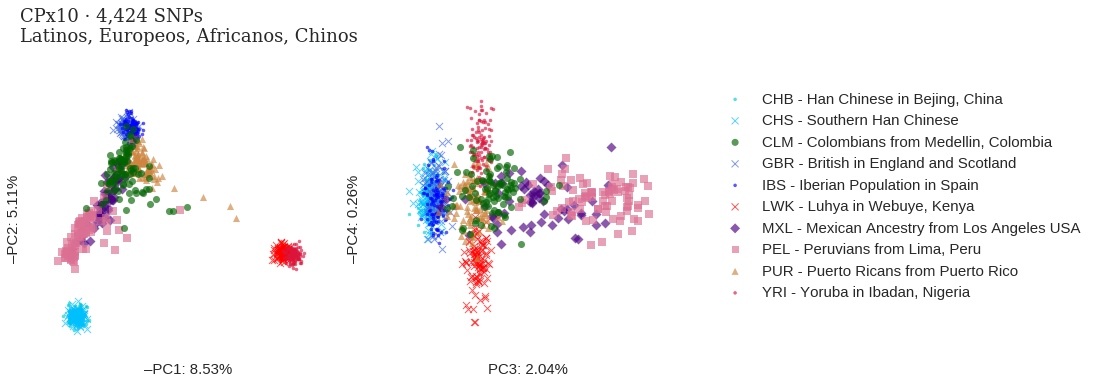

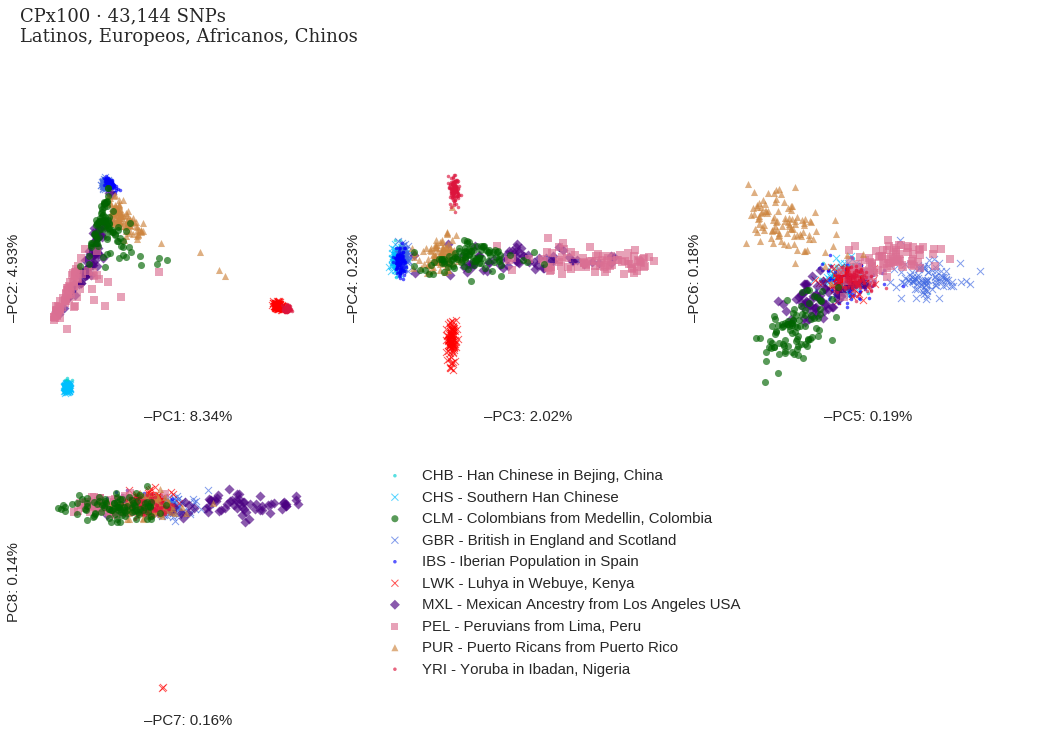

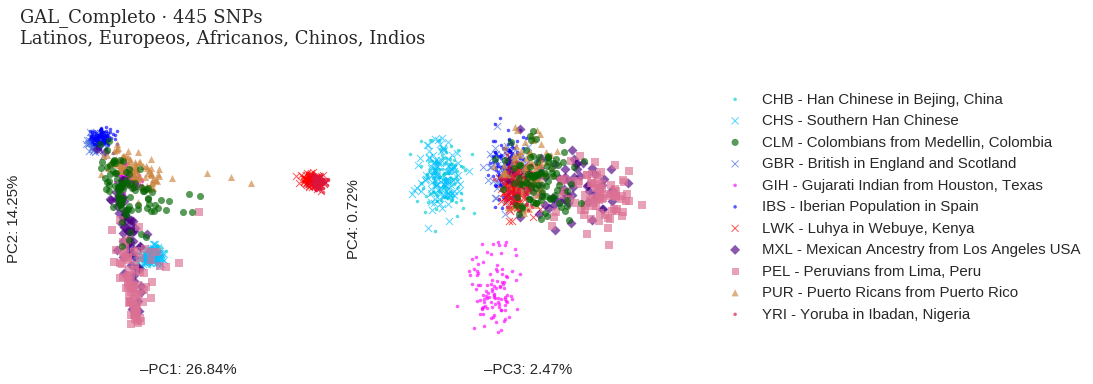

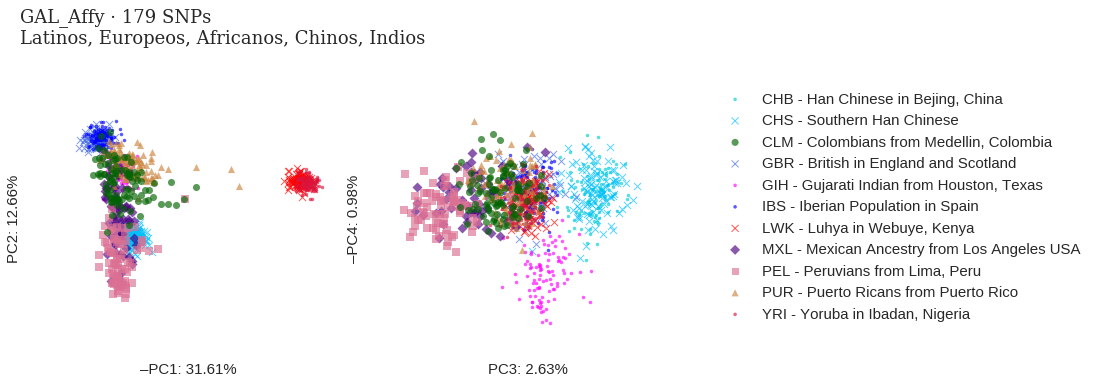

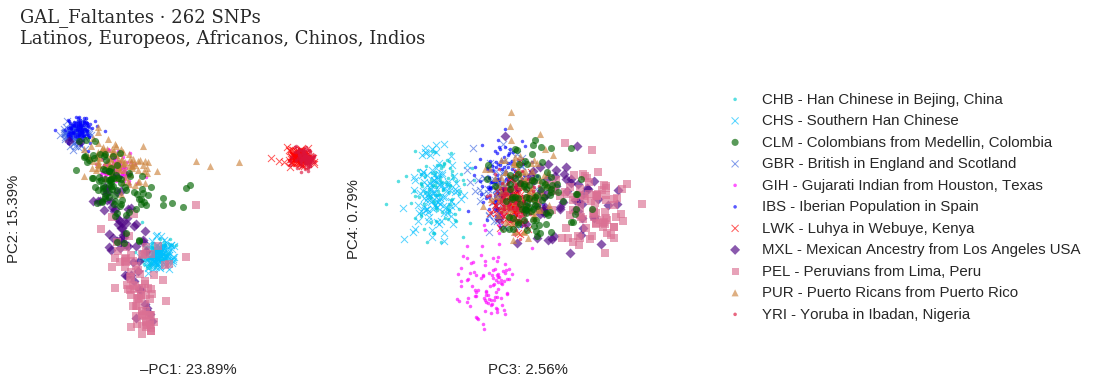

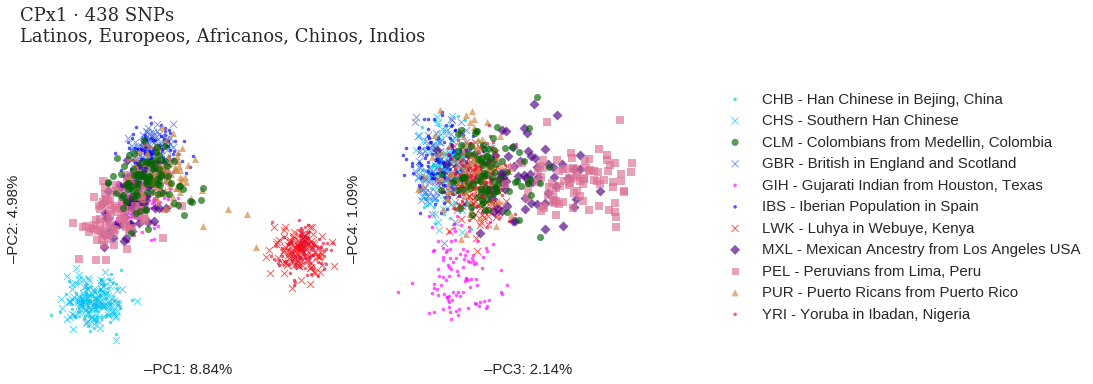

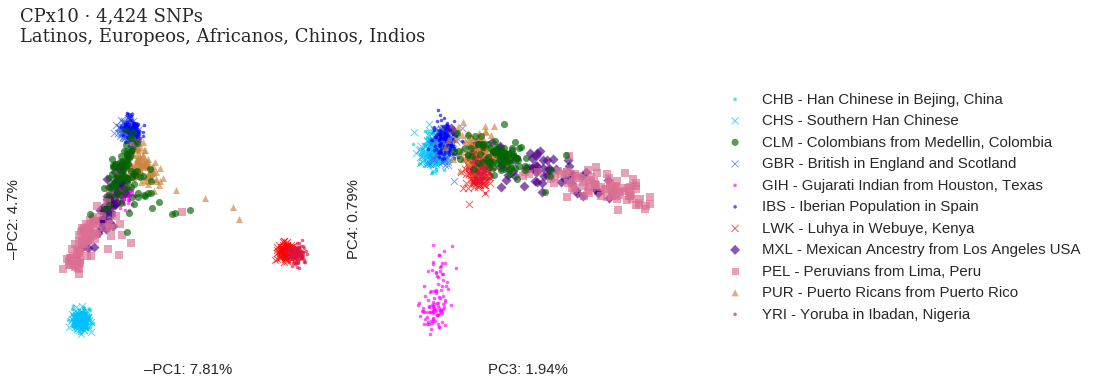

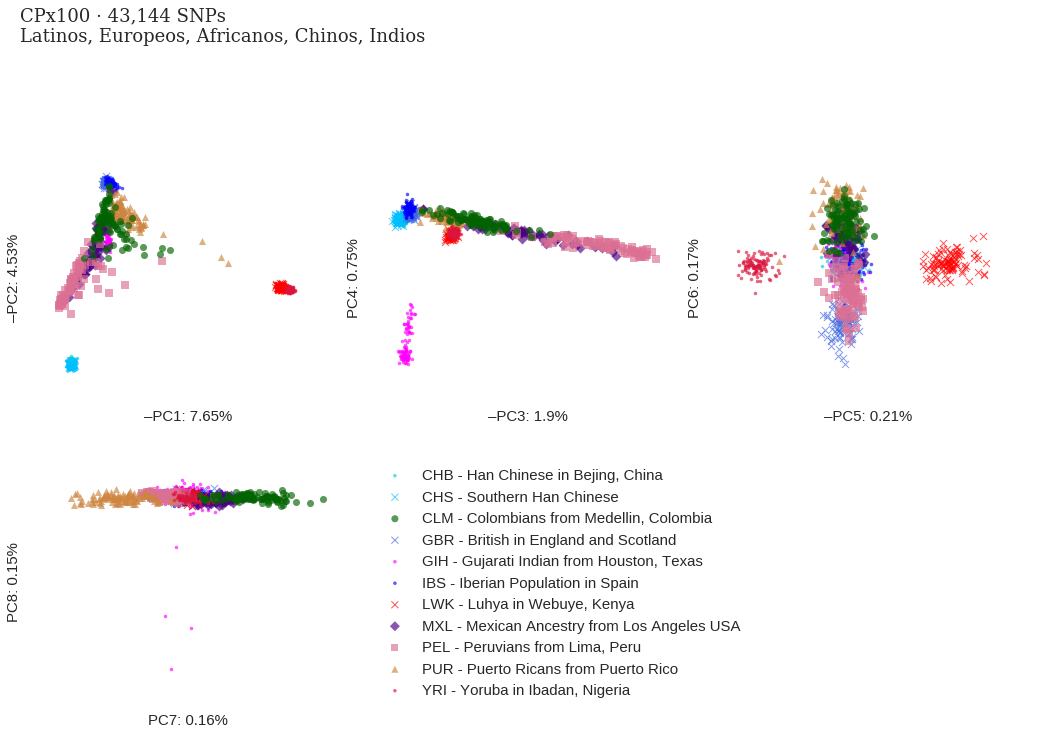

CPU times: user 6min 58s, sys: 37.2 s, total: 7min 36s
Wall time: 5min 55s


In [25]:
%%time
%load_ext autoreload
%autoreload 2

%matplotlib inline

from components.panel import Panel
from components.dataset import Dataset


import matplotlib.pyplot as plt
import seaborn as sns

from pca.pca_generator import PCAGenerator
from pca.pca_plotter import PCAPlotter


sns.set_context("notebook")
sns.set_style("white")

pca_generator = PCAGenerator()
pca_plotter = PCAPlotter()

def make_filename(dataset_label, panel_label, components_to_compare):
    return "{}__{}__PCx{}".format(dataset_label, panel_label,
                                  len(components_to_compare) * 2)


for normalize in [True, False]:

    for dataset in Dataset.all_datasets():

        for panel in Panel.all_panels():
            components = [("PC1", "PC2"), ("PC3", "PC4")]         
            if panel.label == "CPx100":
                components += [("PC5", "PC6"), ("PC7", "PC8")]

            title = "{}\n{}".format(panel.name, dataset.name)
            filename = make_filename(dataset.label, panel.label, components)
            genotypes = panel.genotypes_1000G(dataset=dataset)

            if normalize:
                filename += "_normalized"

            pca_df, explained_var = pca_generator.run(genotypes, normalize=normalize)
            pca_plotter.plot(pca_df, explained_var, title, filename, components)
            plt.show()

## Generate subpanels from GAL_Affy to check the dispersion of the clusters

In [52]:
from components.panel import Panel


p = Panel("GAL_Affy")
p.generate_subset_SNP_list(100)

'/home/juan/tesina/panel_info_files/100_SNPs_from_GAL_Affy'

In [48]:
Panel("100_SNPs_from_GAL_Affy")

OSError: File b'/home/juan/tesina/1000Genomes/all_panels/100_SNPs_from_GAL_Affy.bim' does not exist

In [30]:
from components.dataset import Dataset
from components.panel import Panel
from pca.pca_plotter import PCAPlotter

pca_plotter = PCAPlotter()

subpanel_lengths = [100, 50, 25, 12]


for length in subpanel_lengths:
    fn = Panel("GAL_Affy").generate_subset_SNP_list(length)
    print(fn)

# for dataset in Dataset.all_datasets():
#     # Hacer una nueva figura y plotear los 5 subpaneles en ella en fila!
#     figtitle = "{} · Subsets of GAL_Affy".format(dataset.name)

    
    

KeyError: 'LSBL(Fst)'

In [ ]:
# from panels.panel_creator import PanelCreator
# from plotters.pca import PCAPlotter
# from helpers.plot_helpers import populations_plot_order

# pca_plotter = PCAPlotter()
# panel_creator = PanelCreator()
# subpanel_lengths = [100, 50, 25, 12]

# for dataset_label, sample_ids in dataset_samples.items():

#     figtitle = "{} · Subsets of GAL_Affy".format(dataset_names[dataset_label])
#     components_to_compare = [("PC1", "PC2")]

#     for panel_label, panel in panels.items():
#         subpanels_rsIDs = panel_creator.generate_subpanels(panel, subpanel_lengths)
#         subpanel_names = {k: k for k in subpanels_rsIDs.keys()}  # This is silly

#         filename = make_filename(dataset_label,
#                                  ["{}_Subpanels".format(panel_label)],
#                                  components_to_compare)

#         pca_plotter.plot(figtitle, subpanels_rsIDs, df_1000G_genotypes,
#                          df_1000G_samples.ix[sample_ids], components_to_compare, subpanel_names,
#                          filename, dataset_populations[dataset_label], normalize=True)